# 📌 1. Introduction and Problem Statement

## Task 2 - Credit Risk Prediction
### Project Purpose
The purpose of this project is to develop a predictive model that can accurately determine whether a loan applicant is likely to default or repay a loan. By analyzing historical loan data and applicant features such as income, education, and credit history, the project aims to assist financial institutions in making informed lending decisions, reducing financial risk, and improving loan approval processes through data-driven insights. This is a binary classification problem.


### 👨‍💻 Internship Task Objective:
This task focuses on developing essential data science skills including data preprocessing, visualization, binary classification model building, and model evaluation using Python libraries such as pandas, matplotlib, seaborn, and scikit-learn.

### 📁 Dataset Used:
Loan Prediction Dataset – a public dataset (available on Kaggle) containing information about loan applicants, such as their income, education, employment status, and loan details.

### 🔍 Goal:
- Load and understand the dataset structure and key variables
- Handle missing data appropriately
- Visualize important features such as loan amount, education level, and income
- Train and test classification models such as Logistic Regression and Decision Tree
- Evaluate model performance using accuracy and confusion matrix


# 📌 Step 2 - Dataset Understanding and Description

### 🧾 Objective:
In this step, we will load the dataset, explore its structure, and understand the basic characteristics of each feature. This helps us identify potential issues like missing values, data types, and class imbalance in the target variable.

### 📥 2.1 Load the Dataset

We start by importing the required library (`pandas`) and loading the dataset into a DataFrame.

In [3]:

import pandas as pd

# Load the dataset (ensure 'loan.csv' is in the same directory or provide the full path)
df = pd.read_csv('loan.csv')

# Display the first five rows
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 📊 2.2 Get Basic Information About the Dataset
Use .info() to view column names, data types, and non-null counts. This helps identify missing values and categorical features.

In [4]:
# Get info on data types and non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 📈 2.3 Get Summary Statistics
This provides a statistical summary (count, mean, min, max, etc.) for numerical columns, helping understand the data's scale and distribution.

In [5]:
# Summary statistics for numerical features
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 🎯 2.4 Understand the Target Variable Distribution
The target column Loan_Status indicates loan approval (Y) or rejection (N). Use .value_counts() to check class balance.

In [6]:
# Distribution of target variable
df['Loan_Status'].value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

##### Note: If the dataset is imbalanced (e.g., significantly more approvals than rejections), it might affect model performance. We'll handle that later if needed.

### 🧠 Insight:
There are 422 approved loans and 192 not approved.

This means the dataset is slightly imbalanced, with ~69% approvals and ~31% rejections.

While it's not severely imbalanced, we will keep this in mind during model evaluation, especially when using accuracy as a metric.

### ✅ Step 2 Summary – Dataset Understanding and Description

- Loaded the loan dataset using `pandas`.
- Displayed the first few rows using `.head()` to understand the structure.
- Used `.info()` and `.describe()` to explore column types, non-null values, and statistical summaries.
- Observed that the target variable `Loan_Status` is categorical with classes `'Y'` (422) and `'N'` (192).

🔎 Initial inspection revealed the presence of missing values and class imbalance, which were addressed in the next step.


# 📌 Step 3 - Data Cleaning and Preparation

### 🧹 Objective:
This step focuses on identifying and handling missing data, converting data to the correct format, and removing unnecessary columns. Cleaning ensures the dataset is ready for modeling.

### 🔍 3.1 Check for Missing Values

We use `.isnull().sum()` to identify which columns contain missing data and how many values are missing in each.




In [7]:

# Check missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 🧼 3.2 Handle Missing Values
We handle missing values using the mode (for categorical columns) and median (for numerical columns). These are commonly used imputation techniques that reduce bias.


In [10]:

# Fill missing categorical values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# Fill missing numerical values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])



##### ✅ Note: The use of inplace=True modifies the DataFrame directly without creating a copy.

### 🧾 3.3 Drop Irrelevant Columns
We remove the Loan_ID column as it is a unique identifier and does not contribute to prediction.

In [11]:
# Drop Loan_ID as it's not useful for prediction
df.drop(['Loan_ID'], axis=1, inplace=True)


### ✅ Final Check
After cleaning, it’s a good practice to verify that no missing values remain.

In [12]:
# Re-check for missing values
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### 🎯 Now our dataset is clean and ready for Exploratory Data Analysis (EDA) in the next step.

## ✅ Step 3 Summary - Data Cleaning and Preparation

- Identified missing values using `.isnull().sum()`.
- Handled missing categorical values using the **mode** and numerical values using the **median**.
- Removed the irrelevant `Loan_ID` column as it doesn't contribute to prediction.
- Ensured the dataset is now clean and contains no missing values.

🔄 The dataset is now ready for visualization and analysis in the next step.


# 📊 Step 4 – Exploratory Data Analysis (EDA) with Graphs

In this step, we will explore key features visually to understand their distributions and relationships with the target variable `Loan_Status`.
We will use `seaborn` and `matplotlib` for plotting.

### 🔹 4.1 Loan Amount Distribution
This graph helps identify the spread of loan amounts and spot any skewness or outliers.


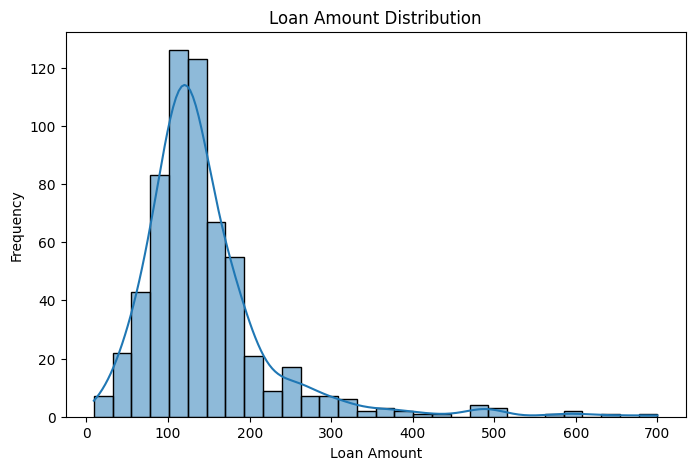

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loan Amount Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


### 🔹 4.2 Education vs Loan Status
This bar plot shows how loan approval varies based on the applicant’s education level.


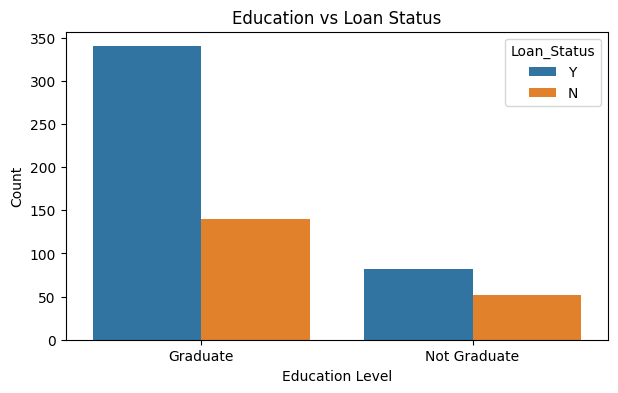

In [14]:
# Education vs Loan Status
plt.figure(figsize=(7, 4))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Education vs Loan Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


### 🔹 4.3 Applicant Income Distribution
This plot helps to understand the income range and identify any outliers or skewed distribution.


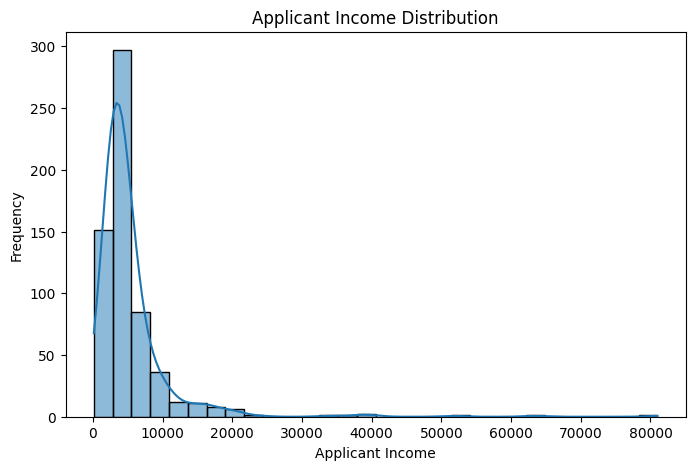

In [15]:
# Applicant Income Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()


### 🔹 4.4 Credit History vs Loan Status
This countplot shows how credit history affects loan approval, which is often a strong predictor.


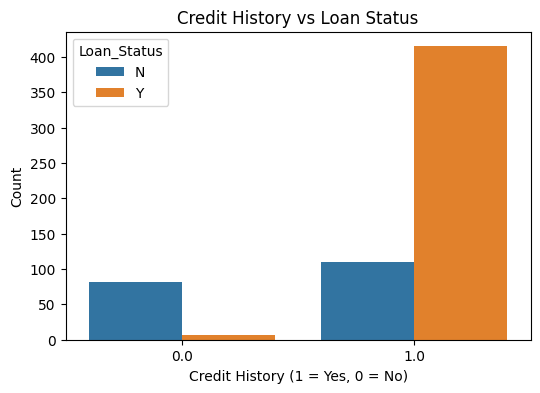

In [16]:
# Credit History vs Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Credit History vs Loan Status')
plt.xlabel('Credit History (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


### ✅ Step 4 Summary – Exploratory Data Analysis (EDA)

- Visualized the distribution of `LoanAmount` and `ApplicantIncome` to understand their spread and identify skewness.
- Analyzed the relationship between `Education` and `Loan_Status`; observed differences in loan approval rates based on education level.
- Explored `Credit_History` impact on loan approval, confirming it as an important feature influencing loan status.
- These visual insights help in understanding key factors affecting loan approval and guide feature selection for modeling.


# ✅ Step 5 - Model Training and Testing
### 📌 5.1 Encode Categorical Variables
- Machine learning models require numeric inputs.
- Convert all categorical columns (including the target `Loan_Status`) into numeric values using `LabelEncoder`.




In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Check the first few rows after encoding
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### 📌 5.2 Prepare Features and Target Variables
- Separate the dataset into features `X` (all columns except `Loan_Status`) and target `y` (`Loan_Status`).


In [18]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


### 📌 5.3 Split Dataset into Training and Testing Sets
 Split the data into training (80%) and testing (20%) sets.
- `random_state=42` ensures reproducibility.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 📌 5.4 Train Logistic Regression Model

- Train a Logistic Regression classifier on the training data.
- Logistic Regression is a popular binary classification algorithm.


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales data then fits logistic regression
log_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000))

log_model.fit(X_train, y_train)





,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


### 📌 5.5 Predict and Evaluate Logistic Regression Model


- Predict the loan status on test data.
- Calculate accuracy score and confusion matrix to evaluate performance.

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]


### 📌 5.6 Train Decision Tree Model


- Train a Decision Tree classifier as an alternative model.
- Decision Trees are intuitive and handle non-linear patterns.

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 📌 5.7 Predict and Evaluate Decision Tree Model


- Predict on test data.
- Calculate accuracy and confusion matrix for comparison with Logistic Regression.

In [25]:
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Accuracy: 0.6910569105691057
Confusion Matrix:
 [[23 20]
 [18 62]]


### Step 5 Summary: Model Training and Evaluation

- **Logistic Regression** achieved an accuracy of **78.86%**.
- Confusion matrix shows it predicted most defaults and non-defaults correctly, but had some false positives.
- **Decision Tree** achieved a lower accuracy of **69.11%**.
- Decision Tree made more false negative errors compared to Logistic Regression.
- Overall, Logistic Regression performed better on this dataset for loan default prediction.


# 6. Evaluation Metrics

- Beyond accuracy and confusion matrix, use **classification report** to evaluate model performance.
- Classification report includes **precision**, **recall**, **f1-score**, and **support** for each class.
- Helps understand model’s performance in more detail, especially for imbalanced datasets.

### Step 6.1: Import classification_report


In [26]:
from sklearn.metrics import classification_report


### Step 6.2: Generate report for Logistic Regression model

In [27]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



##### This prints detailed metrics for Logistic Regression predictions on the test set.

### Step 6.3: Generate report for Decision Tree model

In [28]:
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123



##### This prints the classification metrics for the Decision Tree model predictions.

### Step 6.4 Visualizing Confusion Matrices

- Confusion matrix visualization helps quickly identify the number of true positives, true negatives, false positives, and false negatives.
- Heatmaps provide an intuitive way to interpret these values.


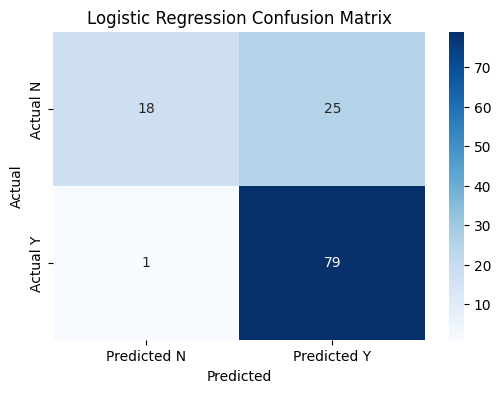

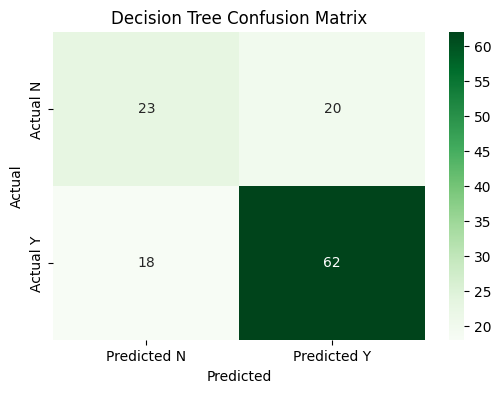

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted N', 'Predicted Y'], yticklabels=['Actual N', 'Actual Y'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Confusion matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted N', 'Predicted Y'], yticklabels=['Actual N', 'Actual Y'])
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Step 6 Summary - Model Evaluation Metrics

- **Logistic Regression:**
  - Accuracy: 79%
  - Precision for class 0 (No Loan): 0.95, class 1 (Loan Approved): 0.76
  - Recall for class 0: 0.42, class 1: 0.99
  - F1-Score indicates strong performance on class 1 but lower recall on class 0.

- **Decision Tree:**
  - Accuracy: 69%
  - Precision for class 0: 0.56, class 1: 0.76
  - Recall for class 0: 0.53, class 1: 0.78
  - Overall, lower scores than Logistic Regression with more balanced precision and recall.

- **Conclusion:** Logistic Regression outperforms Decision Tree in accuracy and recall for the positive class (loan approval), making it a better choice for this dataset.


# Step7 (Optional);Display Predicted Loan Application Decisions
### Step 7.1: Create a copy of your test features data (to keep original safe)

In [30]:
X_test_copy = X_test.copy()


### Step 7.2: Add predicted loan status (from your Logistic Regression model) as a new column

In [31]:
X_test_copy['Predicted_Loan_Status'] = y_pred_log


### Step 7.3: Add actual loan status as a new column for comparison


In [32]:
X_test_copy['Actual_Loan_Status'] = y_test.values


### Step 7.4: Map numeric predictions back to readable labels ('Approved' and 'Rejected')

In [33]:
status_map = {1: 'Approved', 0: 'Rejected'}

X_test_copy['Predicted_Loan_Status'] = X_test_copy['Predicted_Loan_Status'].map(status_map)
X_test_copy['Actual_Loan_Status'] = X_test_copy['Actual_Loan_Status'].map(status_map)


### Step 7.5: Display the first 10 rows to check predictions vs actual status

In [34]:
X_test_copy[['Predicted_Loan_Status', 'Actual_Loan_Status']].head(10)


,Predicted_Loan_Status,Actual_Loan_Status
350,Approved,Approved
377,Approved,Approved
163,Approved,Approved
609,Approved,Approved
132,Approved,Approved
578,Approved,Approved
316,Approved,Approved
2,Approved,Approved
340,Approved,Rejected
77,Approved,Rejected


### 7.6 Visualize Predicted Loan Status Counts with a Bar Plot

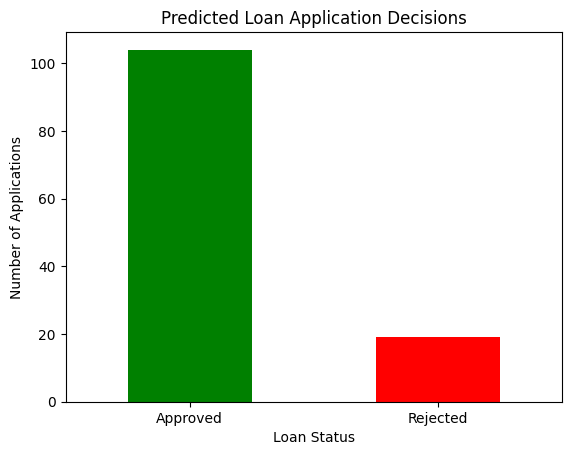

In [35]:
import matplotlib.pyplot as plt

# Count predicted approved and rejected loans
counts = X_test_copy['Predicted_Loan_Status'].value_counts()

# Plot bar chart
counts.plot(kind='bar', color=['green', 'red'])
plt.title('Predicted Loan Application Decisions')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applications')
plt.xticks(rotation=0)
plt.show()


### 7.7 Visualize Predicted Loan Status Distribution with a Pie Chart

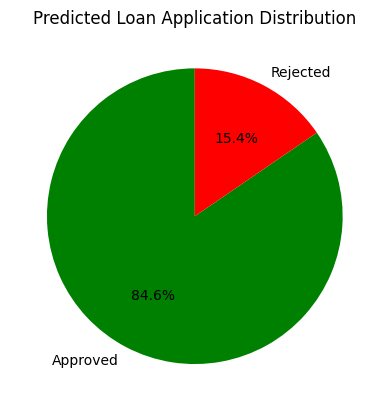

In [36]:
# Plot pie chart
counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Predicted Loan Application Distribution')
plt.ylabel('')  # Hide y-label for cleaner look
plt.show()


### Step 7 Summary - Loan Application Prediction and Visualization

- Predicted loan statuses for test data were added to the dataset.
- Visualization of predictions helps clearly identify the count and distribution of approved and rejected applications.
- This step allows comparing actual vs predicted loan approval outcomes.
- Some discrepancies (e.g., applications predicted as rejected but actually approved) highlight model limitations and areas for improvement.
- Visual tools like bar plots and pie charts enhance understanding of prediction results for stakeholders.


# Project Summary and Conclusion


This project demonstrated the end-to-end process of predicting loan default risk using a real-world dataset. The key steps included:

1. **Dataset Understanding:** Loaded the loan dataset and explored its structure and target variable distribution.
2. **Data Cleaning:** Handled missing values by imputing with mode or median and dropped irrelevant columns to prepare clean data.
3. **Exploratory Data Analysis (EDA):** Visualized key features like loan amount, education, income, and credit history to uncover patterns related to loan status.
4. **Model Training:** Encoded categorical variables, split data into train and test sets, and trained two classification models—Logistic Regression and Decision Tree.
5. **Model Evaluation:** Evaluated models using accuracy and confusion matrices; Logistic Regression showed better accuracy (about 79%) compared to Decision Tree (about 69%).
6. **Detailed Metrics:** Used classification reports for precision, recall, and F1-score to assess model performance in depth.
7. **Prediction Visualization:** Predicted loan approvals and rejections were visualized, enabling clear insights into the model’s decisions and highlighting prediction mismatches.


### Conclusion:
- Logistic Regression outperformed Decision Tree with higher accuracy and better classification metrics.
- Key features influencing loan approval included Credit History, Loan Amount, and Applicant Income.
- Proper data cleaning and encoding were crucial for stable and reliable model performance.
- This project demonstrates a practical approach to credit risk prediction using machine learning, supporting better decision-making in loan approvals.
